<a href="https://colab.research.google.com/github/FLC-ML/raman-id/blob/master/Data%20Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mount Google Drive

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Libraries

In [16]:
# import packages
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import numpy as np
import pandas as pd

Load Data

In [17]:
# load data (specific to google drive)
X_test = np.load('/content/drive/My Drive/ML Group/Datasets/data/X_test.npy')
y_test = np.load('/content/drive/My Drive/ML Group/Datasets/data/y_test.npy')

X = np.load('/content/drive/My Drive/ML Group/Datasets/data/X_reference.npy')
y = np.load('/content/drive/My Drive/ML Group/Datasets/data/y_reference.npy')

X_fine = np.load('/content/drive/My Drive/ML Group/Datasets/data/X_finetune.npy')
y_fine = np.load('/content/drive/My Drive/ML Group/Datasets/data/y_finetune.npy')

print("X Reference Dataset Shape: ", X.shape)
print("y Reference Dataset Shape: ", y.shape)
print("X Test Dataset Shape: ", X_test.shape)
print("y Test Dataset Shape: ", y_test.shape)
print("X Finetuning Dataset Shape: ", X_fine.shape)
print("y Finetuning Dataset Shape: ", y_fine.shape)

X Reference Dataset Shape:  (60000, 1000)
y Reference Dataset Shape:  (60000,)
X Test Dataset Shape:  (3000, 1000)
y Test Dataset Shape:  (3000,)
X Finetuning Dataset Shape:  (3000, 1000)
y Finetuning Dataset Shape:  (3000,)


Smooth Data

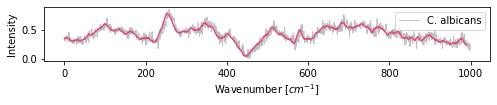

In [23]:
from numpy import convolve

def movingaverage (values, window):
    weights = np.repeat(1.0, window)/window
    sma = np.convolve(values, weights, 'valid')
    return sma
    
X_ref = []
for i in X:
  x_new = movingaverage(i, 10)
  X_ref.append(x_new)
    
#Sample of Smoothing

plt.figure(figsize = (8,1))
plt.xlabel('Wavenumber [$cm^{-1}$]')
plt.ylabel('Intensity')
plt.plot(X[0], color = 'grey', linewidth = 1, alpha = 0.5, label = 'C. albicans')   #original signal
plt.plot(X_ref[0], color = '#dd5182', linewidth = 1.5)                              #smoothed signal
plt.legend()


Save Smoothed Dataset to 'ML Group' as X_ref

In [ ]:
np.save('/content/drive/My Drive/ML Group/Datasets/data/X_ref.npy', X_ref)